<a href="https://www.kaggle.com/code/lakshaykahai/pca-student-performance?scriptVersionId=202304125" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


In [2]:
df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
print('number of columns:',df.columns.value_counts().sum())

number of columns: 20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
numeric_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(include=['object'])

In [8]:
numeric_columns.columns.value_counts().sum()

7

In [9]:
categorical_columns.columns.value_counts().sum()

13

In [10]:
numeric_columns

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


In [11]:
categorical_columns

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


In [12]:
df.isnull().mean()*100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

In [13]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

# Visualising Data

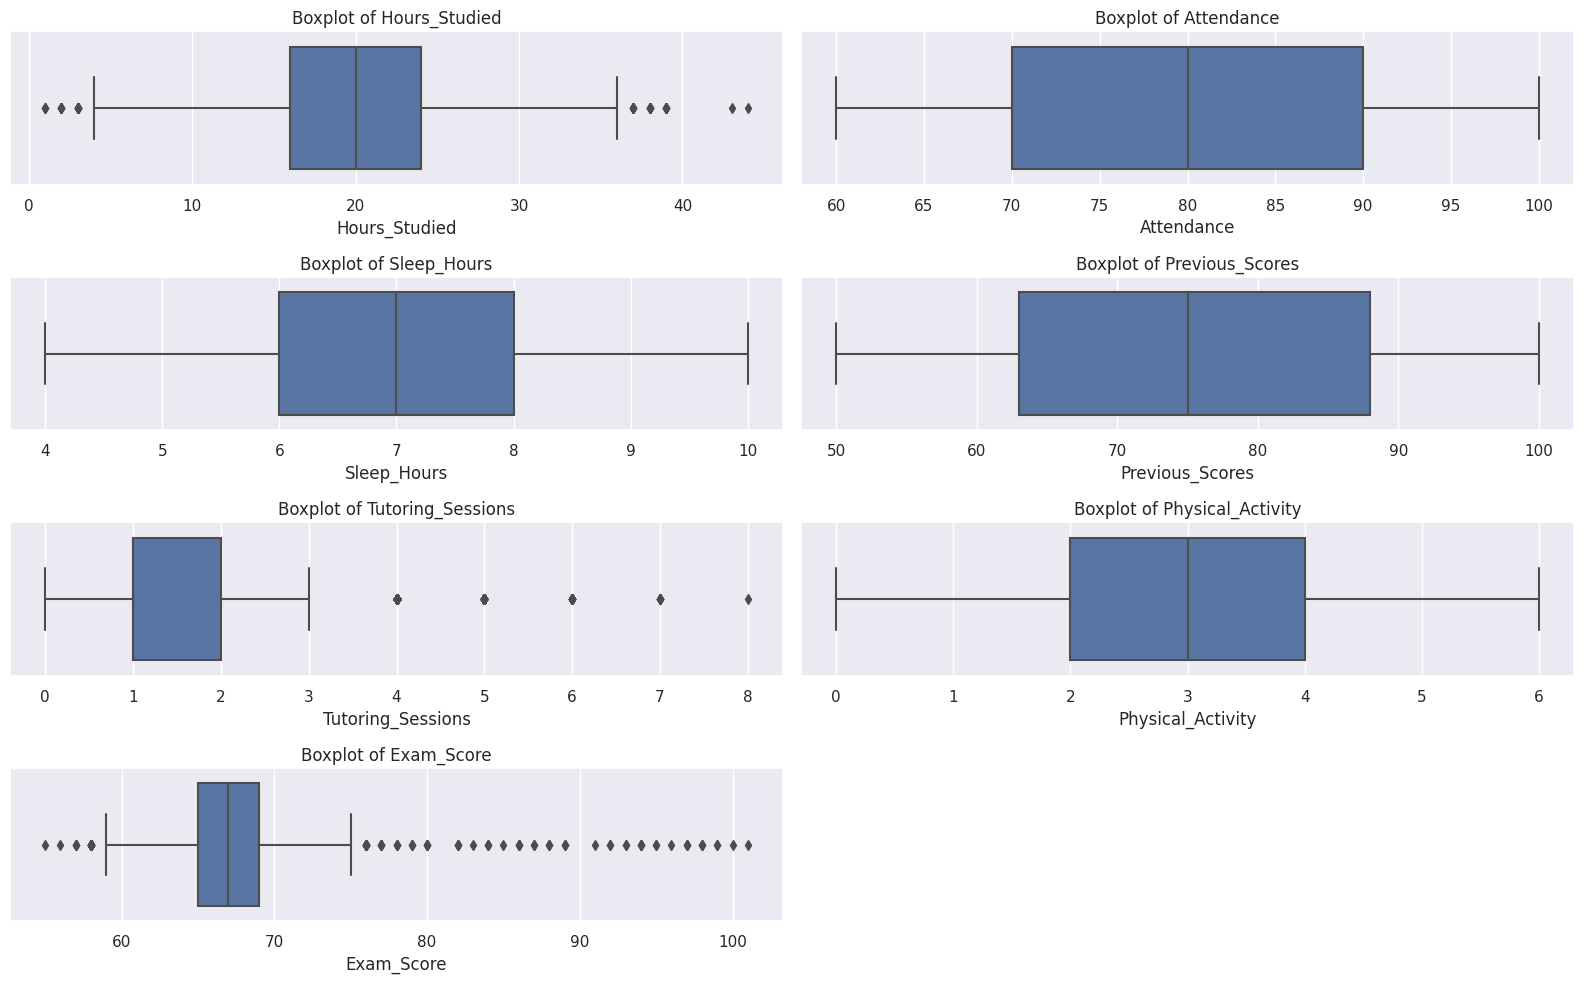

In [14]:
# Select numeric columns only

# Set figure size for better readability
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(len(numeric_columns.columns)//2 + 1, 2, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

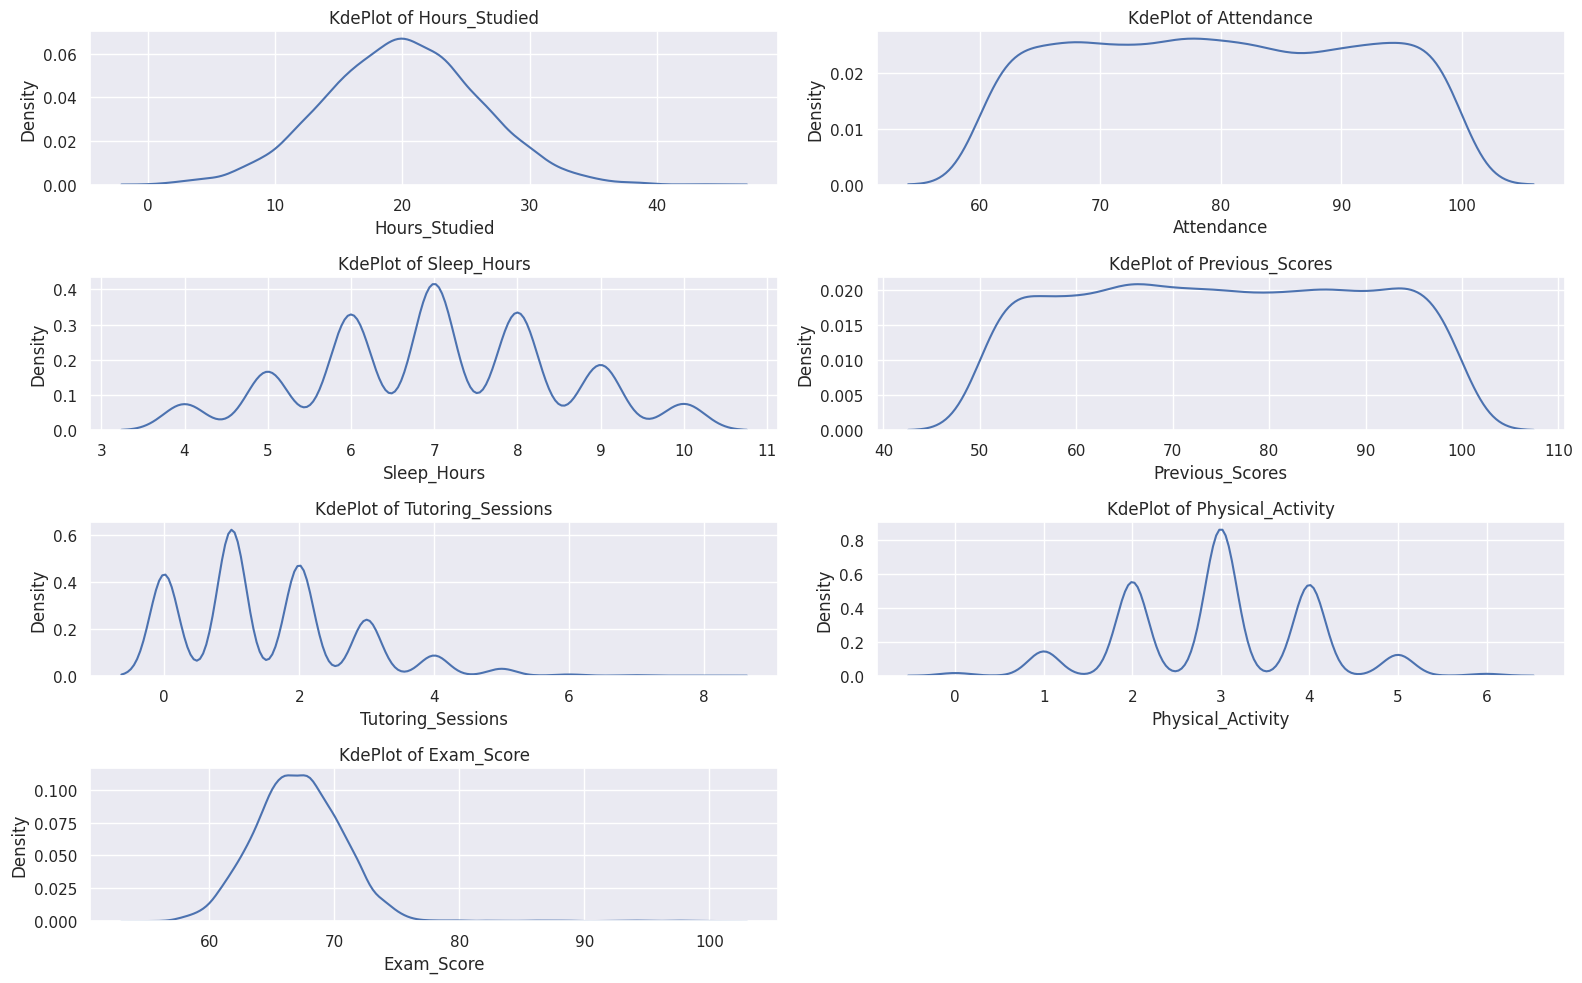

In [15]:
# Select numeric columns only

# Set figure size for better readability
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(len(numeric_columns.columns)//2 + 1, 2, i + 1)
    sns.kdeplot(x=df[column])
    plt.title(f'KdePlot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


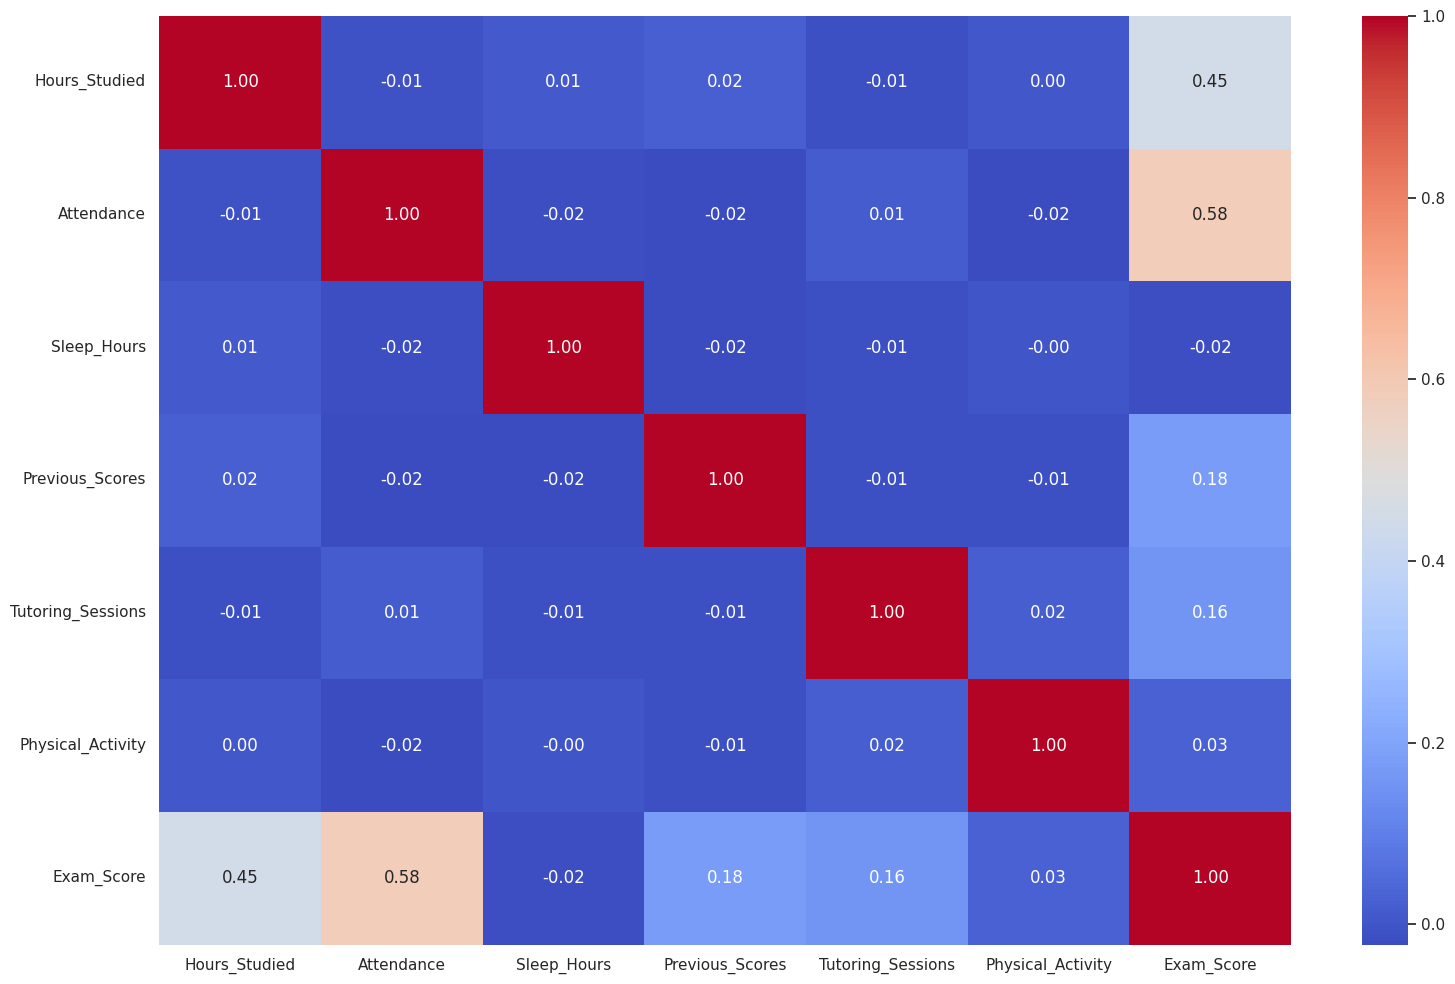

In [16]:
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

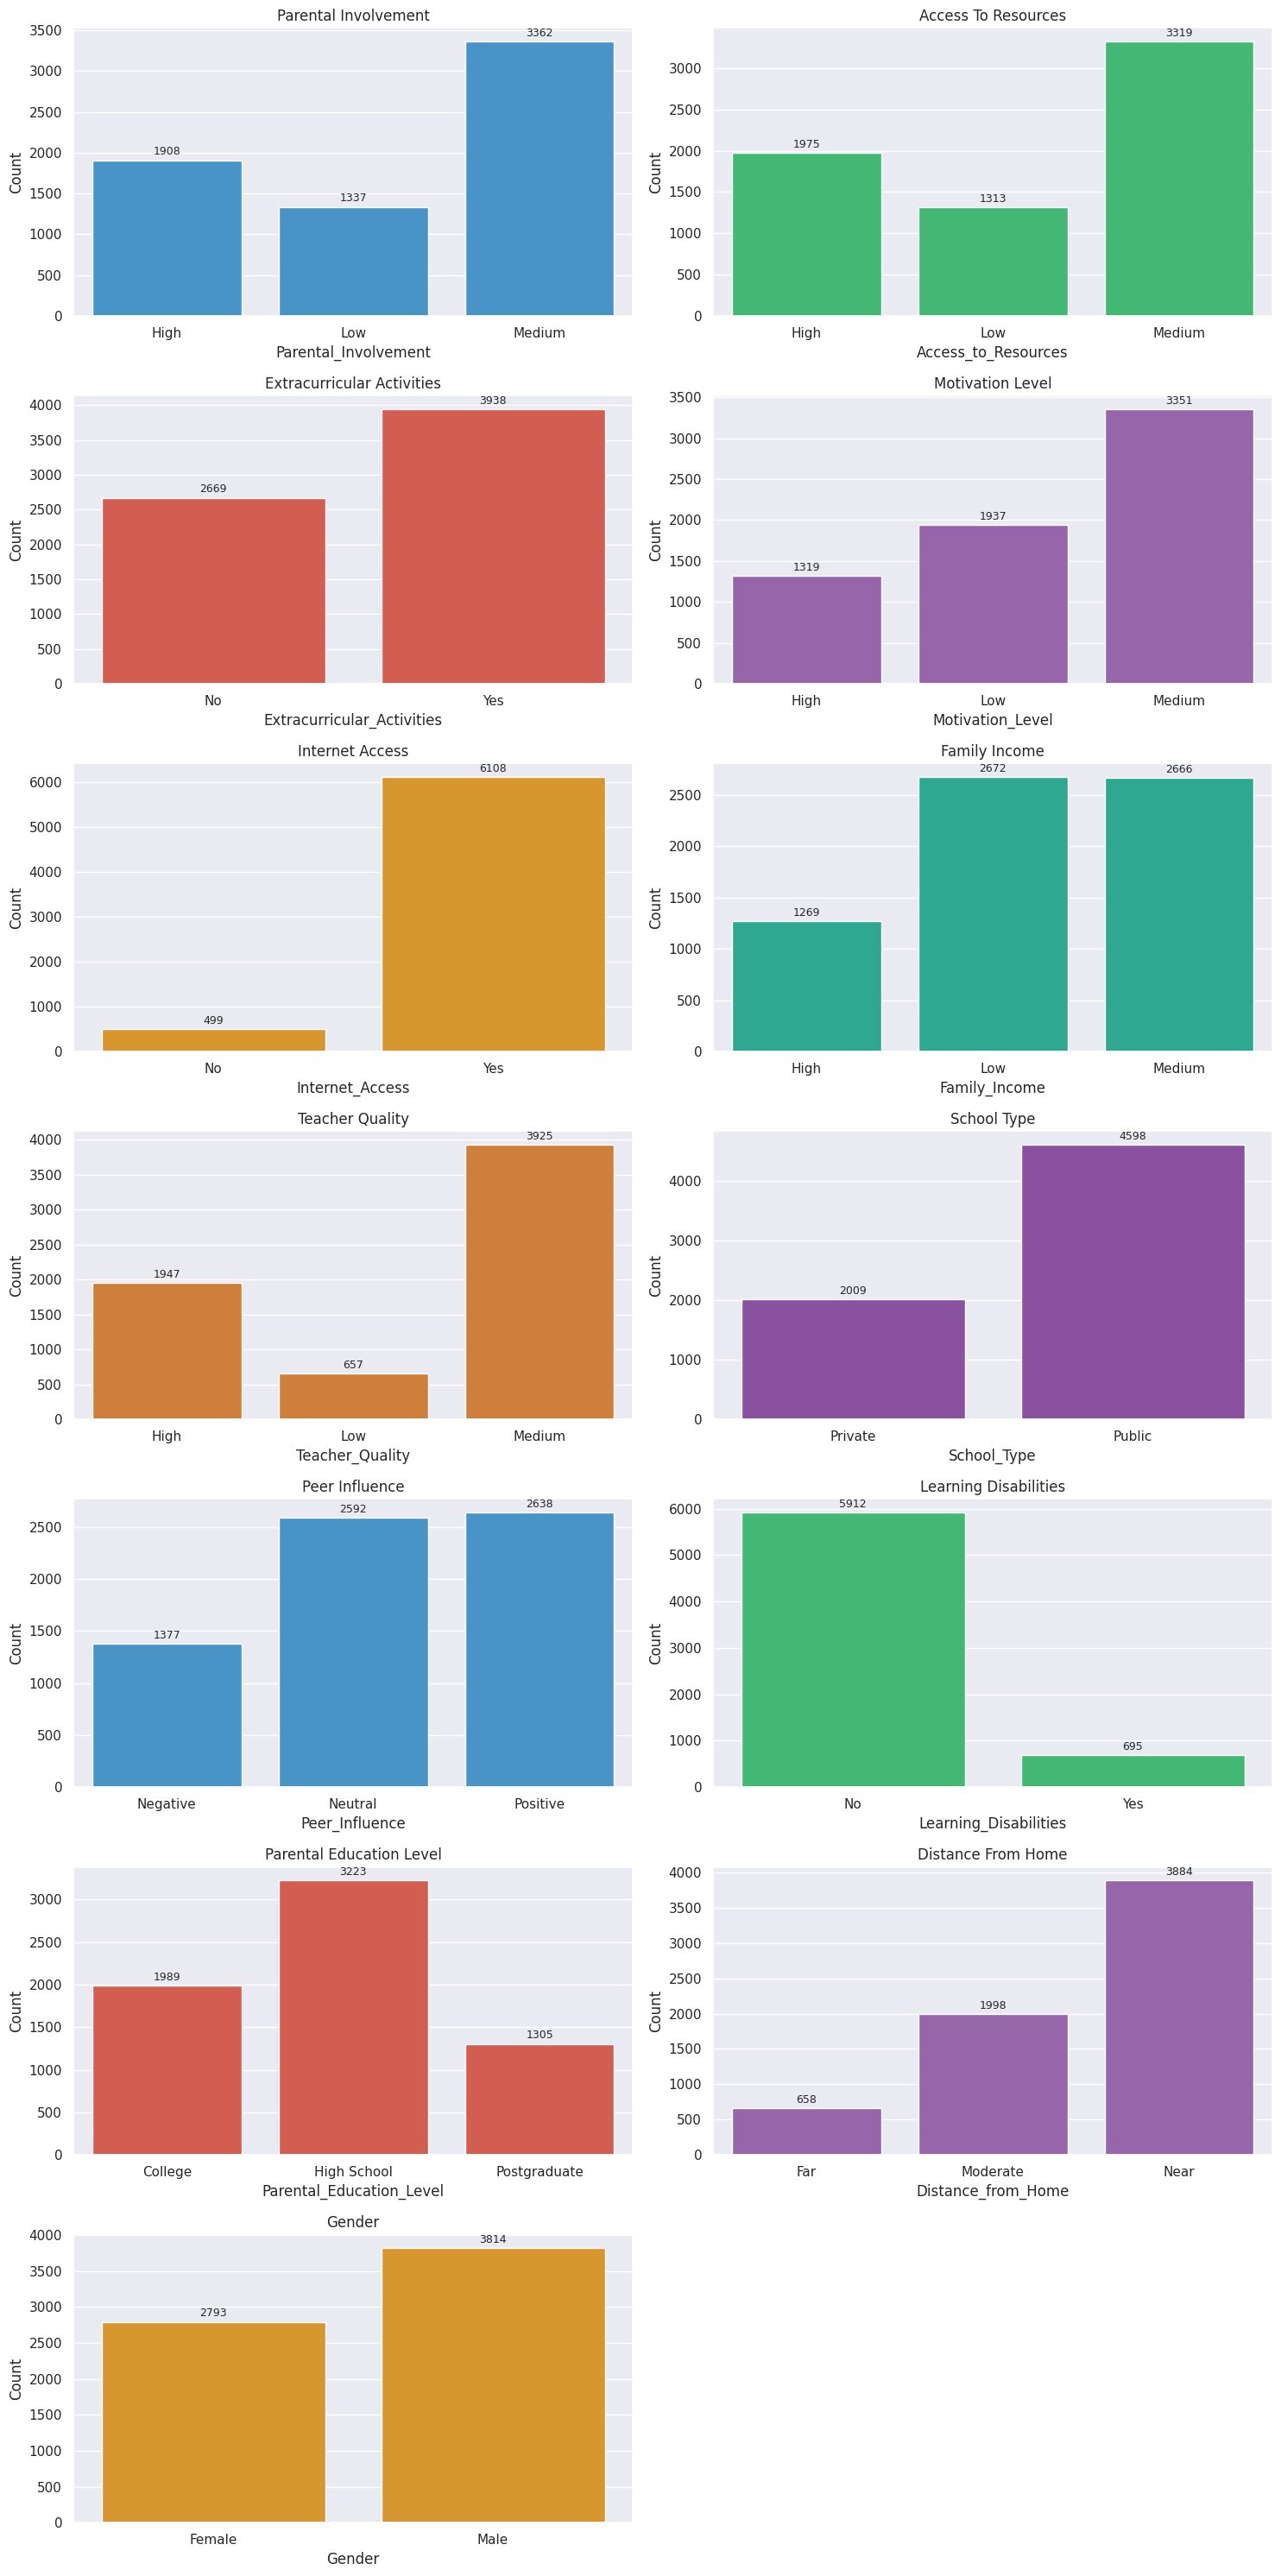

In [17]:
# Set figure size for better readability
plt.figure(figsize=(15, 30))

# List of colors for the plots
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c', '#e67e22', '#8e44ad']

# Plot each categorical column
for i, column in enumerate(categorical_columns.columns):
    counts = df[column].value_counts().sort_index()
    plt.subplot((len(categorical_columns.columns) + 1) // 2, 2, i + 1)
    sns.barplot(x=counts.index, y=counts.values, color=colors[i % len(colors)])
    plt.title(column.replace('_', ' ').title())
    plt.xlabel(column)
    plt.ylabel('Count')
    # Annotate counts above each bar
    for j, count in enumerate(counts):
        plt.text(j, count + (max(counts) * 0.01), str(count), ha='center', va='bottom', fontsize=9)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Data Cleaning

In [18]:
df = df.dropna(axis=0)

In [19]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [20]:
# Create a copy of the original DataFrame for capping the outliers.
df_capped = df.copy()

# Iterate through each numeric column to find and cap outliers.
for i in numeric_columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    print(f'{i}: Upper limit = {upper_limit}')
    print(f'{i}: Lower limit = {lower_limit}')


    # Find outliers above and below the limits.
    outliers_upper = np.where(df[i] > upper_limit)[0]
    outliers_lower = np.where(df[i] < lower_limit)[0]

    # Cap the outliers for the current column.
    df_capped[i] = np.where(
        df_capped[i] > upper_limit,
        upper_limit,
        np.where(
            df_capped[i] < lower_limit,
            lower_limit,
            df_capped[i]
        )
    )

Hours_Studied: Upper limit = 36.0
Hours_Studied: Lower limit = 4.0
Attendance: Upper limit = 120.0
Attendance: Lower limit = 40.0
Sleep_Hours: Upper limit = 11.0
Sleep_Hours: Lower limit = 3.0
Previous_Scores: Upper limit = 125.5
Previous_Scores: Lower limit = 25.5
Tutoring_Sessions: Upper limit = 3.5
Tutoring_Sessions: Lower limit = -0.5
Physical_Activity: Upper limit = 7.0
Physical_Activity: Lower limit = -1.0
Exam_Score: Upper limit = 75.0
Exam_Score: Lower limit = 59.0


In [21]:
df_capped

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84.0,Low,High,No,7.0,73.0,Low,Yes,0.0,Low,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0
1,19.0,64.0,Low,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,Medium,Public,Negative,4.0,No,College,Moderate,Female,61.0
2,24.0,98.0,Medium,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,74.0
3,29.0,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1.0,Medium,Medium,Public,Negative,4.0,No,High School,Moderate,Male,71.0
4,19.0,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3.0,Medium,High,Public,Neutral,4.0,No,College,Near,Female,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,High,Medium,No,7.0,76.0,Medium,Yes,1.0,High,Medium,Public,Positive,2.0,No,High School,Near,Female,68.0
6603,23.0,76.0,High,Medium,No,8.0,81.0,Medium,Yes,3.0,Low,High,Public,Positive,2.0,No,High School,Near,Female,69.0
6604,20.0,90.0,Medium,Low,Yes,6.0,65.0,Low,Yes,3.0,Low,Medium,Public,Negative,2.0,No,Postgraduate,Near,Female,68.0
6605,10.0,86.0,High,High,Yes,6.0,91.0,High,Yes,2.0,Low,Medium,Private,Positive,3.0,No,High School,Far,Female,68.0


In [22]:
df_capped.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.973346,80.020853,7.034964,75.066165,1.436736,2.972719,67.139542
std,5.947598,11.550723,1.468033,14.400389,1.096792,1.028926,3.381262
min,4.000000,60.000000,4.000000,50.000000,0.000000,0.000000,59.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,36.000000,100.000000,10.000000,100.000000,3.500000,6.000000,75.000000


In [23]:
num_col = df_capped.select_dtypes(include=['number'])
cat_col = df_capped.select_dtypes(include=['object'])

In [24]:
cat_col

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


In [25]:
cat_col.nunique()

Parental_Involvement          3
Access_to_Resources           3
Extracurricular_Activities    2
Motivation_Level              3
Internet_Access               2
Family_Income                 3
Teacher_Quality               3
School_Type                   2
Peer_Influence                3
Learning_Disabilities         2
Parental_Education_Level      3
Distance_from_Home            3
Gender                        2
dtype: int64

In [26]:
np.where(df_capped.nunique() == 3)


(array([ 2,  3,  7, 10, 11, 13, 16, 17]),)

In [27]:
np.where(df_capped.nunique() == 2)

(array([ 4,  8, 12, 15, 18]),)

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [29]:
for col in  [2,  3,  7, 10, 11, 13, 16, 17]:
    print(f"Unique values in column {col}:", df_capped.iloc[:, col].unique())


Unique values in column 2: ['Low' 'Medium' 'High']
Unique values in column 3: ['High' 'Medium' 'Low']
Unique values in column 7: ['Low' 'Medium' 'High']
Unique values in column 10: ['Low' 'Medium' 'High']
Unique values in column 11: ['Medium' 'High' 'Low']
Unique values in column 13: ['Positive' 'Negative' 'Neutral']
Unique values in column 16: ['High School' 'College' 'Postgraduate']
Unique values in column 17: ['Near' 'Moderate' 'Far']


In [30]:
scale = StandardScaler()
ohe = OneHotEncoder(sparse_output=False,drop='first')
oe1 = OrdinalEncoder(categories='auto')
oe2 = OrdinalEncoder(categories=[['Negative','Neutral','Positive']])
oe3 = OrdinalEncoder(categories=[['High School','College','Postgraduate']])
oe4 = OrdinalEncoder(categories=[['Near','Moderate','Far']])

In [31]:
clf = ColumnTransformer(transformers=[
    ('tf1', ohe, [4,8,12,15,18]),  # OneHotEncoder for these column indices
    ('tf2', oe1, [2,3,7,10,11]),    # Another encoder (possibly OrdinalEncoder) for these column indices
    ('tf3', oe2, [13]),                 # Another encoder for column index 8
    ('tf4', oe3, [16]),                # Another encoder for column index 10
    ('tf5', oe4, [17])                 # Another encoder for column index 11
], remainder='passthrough')  # Keep other columns unchanged


In [32]:
df_trf = clf.fit_transform(df_capped)

In [33]:
df_trf = pd.DataFrame(df_trf,columns=clf.get_feature_names_out())

In [34]:
df_trf

,tf1__Extracurricular_Activities_Yes,tf1__Internet_Access_Yes,tf1__School_Type_Public,tf1__Learning_Disabilities_Yes,tf1__Gender_Male,tf2__Parental_Involvement,tf2__Access_to_Resources,tf2__Motivation_Level,tf2__Family_Income,tf2__Teacher_Quality,tf3__Peer_Influence,tf4__Parental_Education_Level,tf5__Distance_from_Home,remainder__Hours_Studied,remainder__Attendance,remainder__Sleep_Hours,remainder__Previous_Scores,remainder__Tutoring_Sessions,remainder__Physical_Activity,remainder__Exam_Score
0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,23.0,84.0,7.0,73.0,0.0,3.0,67.0
1,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,1.0,19.0,64.0,8.0,59.0,2.0,4.0,61.0
2,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,24.0,98.0,7.0,91.0,2.0,4.0,74.0
3,1.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,29.0,89.0,8.0,98.0,1.0,4.0,71.0
4,1.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,19.0,92.0,6.0,65.0,3.0,4.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,0.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,25.0,69.0,7.0,76.0,1.0,2.0,68.0
6374,0.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,23.0,76.0,8.0,81.0,3.0,2.0,69.0
6375,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,20.0,90.0,6.0,65.0,3.0,2.0,68.0
6376,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,2.0,10.0,86.0,6.0,91.0,2.0,3.0,68.0


# Applying PCA

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x = df_trf.iloc[:,0:19]
y = df_trf.iloc[:,19:]
y = np.array(y)
y = y.reshape(-1)

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=365)

In [38]:
x_train.shape

(5102, 19)

In [39]:
x_test.shape

(1276, 19)

For applying PCA, we first have to scale the features.

In [40]:
clf2 = ColumnTransformer(transformers=[
    ('scale',scale,x_train.columns)
])

In [41]:
x_train_scaled = clf2.fit_transform(x_train)
x_test_scaled = clf2.transform(x_test)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=clf2.get_feature_names_out())
x_test_scaled = pd.DataFrame(x_test_scaled, columns=clf2.get_feature_names_out())

In [42]:
x_train_scaled

,scale__tf1__Extracurricular_Activities_Yes,scale__tf1__Internet_Access_Yes,scale__tf1__School_Type_Public,scale__tf1__Learning_Disabilities_Yes,scale__tf1__Gender_Male,scale__tf2__Parental_Involvement,scale__tf2__Access_to_Resources,scale__tf2__Motivation_Level,scale__tf2__Family_Income,scale__tf2__Teacher_Quality,scale__tf3__Peer_Influence,scale__tf4__Parental_Education_Level,scale__tf5__Distance_from_Home,scale__remainder__Hours_Studied,scale__remainder__Attendance,scale__remainder__Sleep_Hours,scale__remainder__Previous_Scores,scale__remainder__Tutoring_Sessions,scale__remainder__Physical_Activity
0,0.815230,0.288092,0.665487,-0.341191,-1.166127,-1.408996,0.913036,-1.672044,-0.276704,0.774767,1.069149,0.364178,2.216128,-0.517214,0.776102,-2.078978,-1.606107,-1.313027,0.027328
1,-1.226647,0.288092,-1.502658,-0.341191,-1.166127,0.897291,-1.391346,0.885141,-0.276704,0.774767,-0.250667,-0.908449,-0.751506,-0.517214,-0.173584,-0.020310,-0.771807,-1.313027,0.027328
2,0.815230,0.288092,0.665487,-0.341191,0.857540,0.897291,-1.391346,-0.393451,-0.276704,0.774767,-0.250667,1.636804,0.732311,-0.182529,-1.295941,1.352136,-1.049907,-0.396289,0.027328
3,0.815230,0.288092,0.665487,-0.341191,0.857540,-0.255852,-0.239155,0.885141,1.065259,-1.449690,1.069149,0.364178,2.216128,-0.015186,-1.641281,-0.706532,-0.841332,-0.396289,0.995592
4,0.815230,-3.471108,-1.502658,-0.341191,0.857540,0.897291,0.913036,0.885141,1.065259,-0.337462,-1.570483,-0.908449,-0.751506,1.992926,0.517097,-0.706532,0.132019,0.520449,0.995592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,-1.226647,0.288092,0.665487,-0.341191,0.857540,0.897291,0.913036,-0.393451,-0.276704,-1.449690,1.069149,-0.908449,-0.751506,-0.684557,-1.641281,1.352136,0.757744,0.520449,-0.940935
5098,-1.226647,0.288092,0.665487,-0.341191,-1.166127,0.897291,0.913036,0.885141,-0.276704,0.774767,-0.250667,1.636804,-0.751506,-0.015186,-0.864265,0.665913,-0.354657,-1.313027,1.963855
5099,0.815230,0.288092,0.665487,2.930909,0.857540,-0.255852,-0.239155,0.885141,-1.618667,-1.449690,1.069149,1.636804,-0.751506,0.152157,-0.864265,0.665913,0.618694,-0.396289,0.027328
5100,0.815230,-3.471108,0.665487,-0.341191,0.857540,-0.255852,0.913036,-1.672044,1.065259,0.774767,1.069149,0.364178,2.216128,-0.015186,1.725789,-0.706532,-0.980382,1.437188,0.995592


# Model Building

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score ,KFold
from sklearn.metrics import r2_score

In [44]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = DecisionTreeRegressor()
model4 = KNeighborsRegressor()

In [45]:
for i in range(1,19):
    pca = PCA(n_components=i)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)
    model1.fit(x_train,y_train)
    model2.fit(x_train,y_train)
    model3.fit(x_train,y_train)
    model4.fit(x_train,y_train)
    
    y_pred1 = model1.predict(x_test)
    y_pred2 = model2.predict(x_test)
    y_pred3 = model3.predict(x_test)
    y_pred4 = model4.predict(x_test)

    print('Linear Regression:' , r2_score(y_test,y_pred1))
    print('Gradient Boosting Regression:' , r2_score(y_test,y_pred2))
    print('Decision Tree Regression:' , r2_score(y_test,y_pred3))
    print('KNeighbors Regression:' , r2_score(y_test,y_pred4))
    


Linear Regression: 0.8437706697768215
Gradient Boosting Regression: 0.8933193683705175
Decision Tree Regression: 0.5625959243729646
KNeighbors Regression: 0.7299117629167672
Linear Regression: 0.8437706697768215
Gradient Boosting Regression: 0.8933193683705178
Decision Tree Regression: 0.5895439716342731
KNeighbors Regression: 0.7299117629167672
Linear Regression: 0.8437706697768215
Gradient Boosting Regression: 0.8933193683705176
Decision Tree Regression: 0.5729164531113381
KNeighbors Regression: 0.7299117629167672
Linear Regression: 0.8437706697768215
Gradient Boosting Regression: 0.8933193683705177
Decision Tree Regression: 0.577001662403611
KNeighbors Regression: 0.7299117629167672
Linear Regression: 0.8437706697768215
Gradient Boosting Regression: 0.8933193683705175
Decision Tree Regression: 0.5921957741573274
KNeighbors Regression: 0.7299117629167672
Linear Regression: 0.8437706697768215
Gradient Boosting Regression: 0.8933193683705178
Decision Tree Regression: 0.5680428700959951

In [46]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05837507, 0.11555399, 0.1720466 , 0.2275673 , 0.28270627,
       0.33721289, 0.39146478, 0.44517624, 0.49837386, 0.55089511,
       0.60279557, 0.65446236, 0.7058514 , 0.75660067, 0.80658307,
       0.85632949, 0.90527188, 0.95348495])

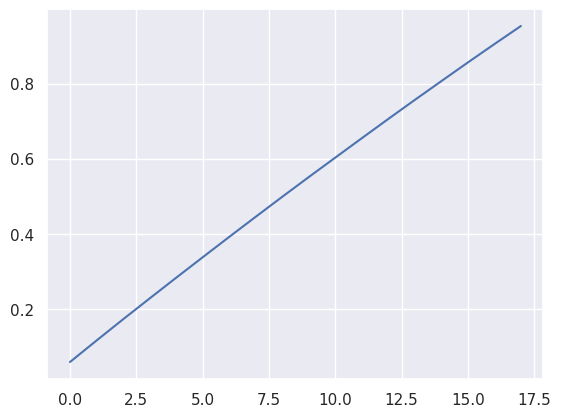

In [47]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Without PCA

In [48]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
    
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)

print('Linear Regression:' , r2_score(y_test,y_pred1))
print('Gradient Boosting Regression:' , r2_score(y_test,y_pred2))
print('Decision Tree Regression:' , r2_score(y_test,y_pred3))
print('KNeighbors Regression:' , r2_score(y_test,y_pred4))

Linear Regression: 0.8437706697768215
Gradient Boosting Regression: 0.8933193683705175
Decision Tree Regression: 0.5678278590806123
KNeighbors Regression: 0.7299117629167672


# Cross Validation

In [49]:
model1 = LinearRegression()

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model1, x, y, cv=kf, scoring='r2')

# Print cross-validation results
print("Cross-validation r2 scores:", cv_scores)
print(f"Mean r2 score: {cv_scores.mean():.4f}")
print(f"Standard deviation of r2 scores: {cv_scores.std():.4f}")

Cross-validation r2 scores: [0.85429705 0.84651068 0.84722217 0.85657101 0.8228838 ]
Mean r2 score: 0.8455
Standard deviation of r2 scores: 0.0120


In [50]:
model2 = GradientBoostingRegressor()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model2,x,y ,cv=kf, scoring='r2')

# Print cross-validation results
print("Cross-validation r2 scores:", cv_scores)
print(f"Mean r2 score: {cv_scores.mean():.4f}")
print(f"Standard deviation of r2 scores: {cv_scores.std():.4f}")

Cross-validation r2 scores: [0.89406052 0.88820885 0.88600552 0.89572402 0.87153055]
Mean r2 score: 0.8871
Standard deviation of r2 scores: 0.0086


In [51]:
model3 = DecisionTreeRegressor()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model3,x,y ,cv=kf, scoring='r2')

# Print cross-validation results
print("Cross-validation r2 scores:", cv_scores)
print(f"Mean r2 score: {cv_scores.mean():.4f}")
print(f"Standard deviation of r2 scores: {cv_scores.std():.4f}")

Cross-validation r2 scores: [0.59030232 0.59106488 0.63751544 0.60152497 0.61735998]
Mean r2 score: 0.6076
Standard deviation of r2 scores: 0.0179


In [52]:
model4 = KNeighborsRegressor()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model4,x,y ,cv=kf, scoring='r2')

# Print cross-validation results
print("Cross-validation r2 scores:", cv_scores)
print(f"Mean r2 score: {cv_scores.mean():.4f}")
print(f"Standard deviation of r2 scores: {cv_scores.std():.4f}")

Cross-validation r2 scores: [0.73929817 0.71227975 0.71837915 0.7528179  0.72728178]
Mean r2 score: 0.7300
Standard deviation of r2 scores: 0.0146


# Visualising 

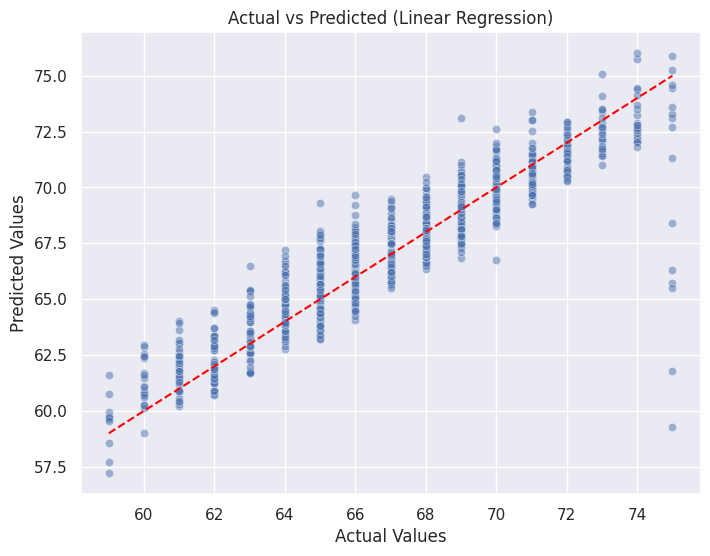

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred1, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Linear Regression)')
plt.show()


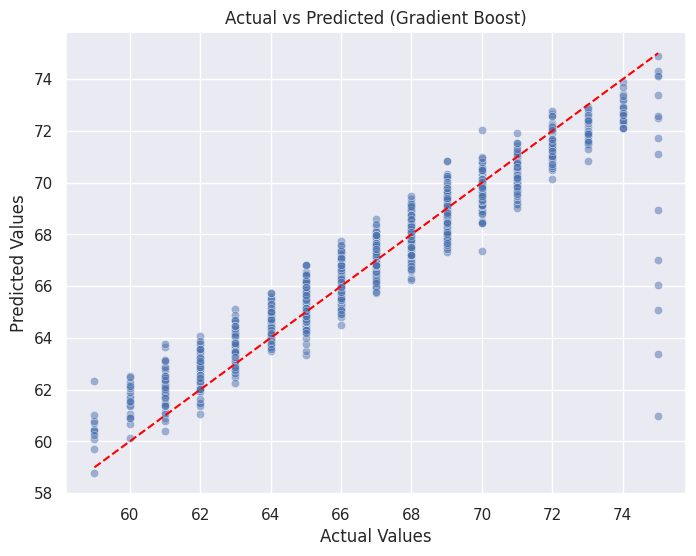

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred2, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Gradient Boost)')
plt.show()


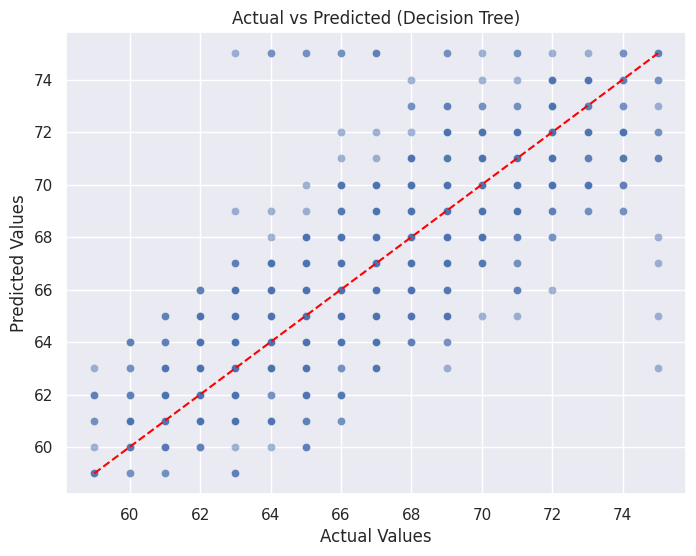

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred3, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Decision Tree)')
plt.show()


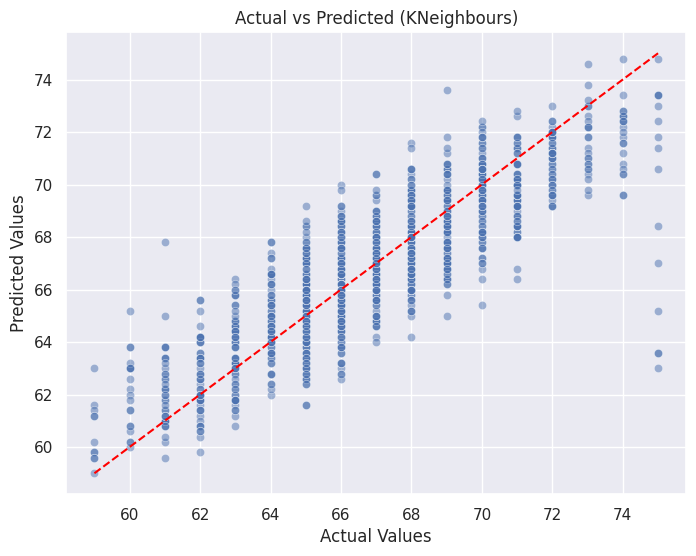

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred4, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (KNeighbours)')
plt.show()


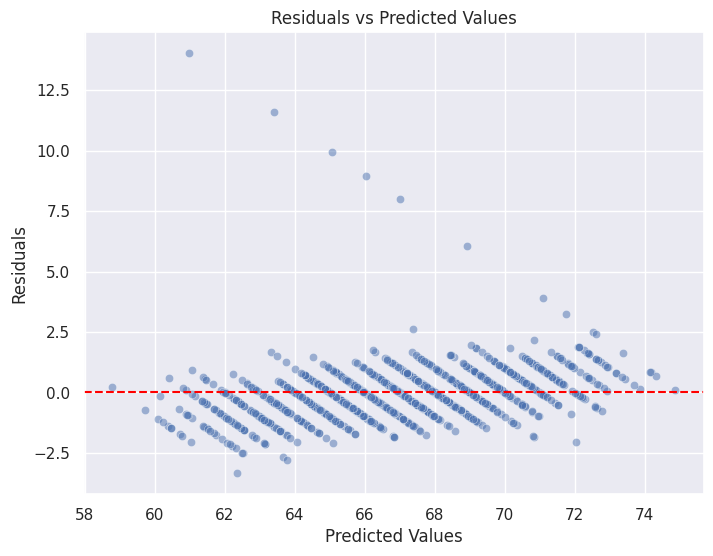

In [57]:
residuals = y_test - y_pred2

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred2, y=residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()
